In [52]:
## Needed modules
import pickle   
import numpy as np

import sys
import os.path
from pylab import *
#import h5py

## to import the custom library in ipython
sys.path.insert(1, '/home/noxpara/Documents/physics_prog/cle/python/')
import importlib        ### to reload external files after changes are made within modules.
import cle_utils

In [53]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from mpl_toolkits.axes_grid.inset_locator import inset_axes

# colorbar function to have nice colorbars in figures with title
def colorbar(mappable,*args,**kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax,format='%.2f')
    #cbar.formatter.set_powerlimits((0, 0))
    title= kwargs.get('title', None)
    cbar.set_label(title)
    plt.sca(last_axes)
    return cbar

In [147]:
with open('obsstokes_3dipole_hires_fullspectra.pkl','rb') as f:
    sobs1,sobs2,sobs3,sobsa,waveA,waveB = pickle.load(f)

In [244]:
# with open('outparams_3dipoles_2line_20211112-14:52:34.pkl','rb') as f:
#     specout,blosout,invout,sfound= pickle.load(f)
# with open('outparams_3dipoles_2line_20220217-20:22:59.pkl','rb') as f:
#     specout,blosout,invout,sfound= pickle.load(f)
# with open('outparams_3dipoles_2line_20220217-23:41:53.pkl','rb') as f:      ## standard deviation+rms noise+5 vectors                           ### possible incorrect addressing of diff
#     specout,blosout,invout,sfound= pickle.load(f)    
# with open('outparams_3dipoles_2line_20220218-08:11:28.pkl','rb') as f:        ##rms noise +5 vectors                                            ### possible incorrect addressing of diff                               
#     specout,blosout,invout,sfound= pickle.load(f)        
# with open('outparams_3dipoles_2line_20220218-09:27:59.pkl','rb') as f:      ## standard deviation +5 vectors                                    ### possible incorrect addressing of diff
#     specout,blosout,invout,sfound= pickle.load(f)  
# with open('outparams_3dipole_2line_20220218-13:03:33.pkl','rb') as f:      ## standard deviation but with 8 vectors
#     specout,blosout,invout,sfound= pickle.load(f)     
# with open('outparams_3dipole_2line_20220218-14:43:57.pkl','rb') as f:      ## standard deviation+rmsnoise  but with 8 vectors + d=7
#     specout,blosout,invout,sfound= pickle.load(f)   
# with open('outparams_3dipoles_2line_20220219-12:49:09.pkl','rb') as f:      ## standard deviation+rmsnoise  with 5 vectors in a 5 element array
#     specout,blosout,invout,sfound= pickle.load(f)   
# with open('outparams_3dipoles_2line_20220219-14:11:19.pkl','rb') as f:      ## standard deviation+rmsnoise  with 6  vectors in a 6 element array
#     specout,blosout,invout,sfound= pickle.load(f)   
with open('outparams_3dipoles_2line_20220220-13:00:01.pkl','rb') as f:      ## no rms 8 vectors in 8 element arrays
    specout,blosout,invout,sfound= pickle.load(f)   

# with open('outparams_3dipoles_2line_20220220-23:36:31.pkl','rb') as f:      ## no rms  with 7  vectors in a 7 element array
#     specout,blosout,invout,sfound= pickle.load(f)  

# with open('outparams_3dipoles_2line_20220220-19:46:38.pkl','rb') as f:      ## no rms  with 6  vectors in a 6 element array
#     specout,blosout,invout,sfound= pickle.load(f)       
# with open('outparams_3dipoles_2line_20220220-21:07:59.pkl','rb') as f:      ## no rms  with 5  vectors in a 5 element array
#     specout,blosout,invout,sfound= pickle.load(f)   
 
        
   


In [245]:
## check correctly defined arrays are loaded
#invout.shape, sobs1.shape, np.array(atm1.bx).shape


In [246]:
## atmosphere as synthesised by CLE components

## load 3 atmos files
atm1=cle_utils.atmos_params('/home/noxpara/Documents/physics_prog/cle/test_cle_3dipole/A_DIPOLE/ATMOS')
atm2=cle_utils.atmos_params('/home/noxpara/Documents/physics_prog/cle/test_cle_3dipole/B_DIPOLE//ATMOS')
atm3=cle_utils.atmos_params('/home/noxpara/Documents/physics_prog/cle/test_cle_3dipole/C_DIPOLE//ATMOS')

## average cartezian XYZ fields
bx1=( np.average(atm1.bx,axis=0)+np.average(atm2.bx,axis=0)+np.average(atm3.bx,axis=0) )#/3.
by1=( np.average(atm1.by,axis=0)+np.average(atm2.by,axis=0)+np.average(atm3.by,axis=0) )#/3.
bz1=( np.average(atm1.bz,axis=0)+np.average(atm2.bz,axis=0)+np.average(atm3.bz,axis=0) )#/3.

#bx1=np.sum(atm3.bx,axis=0)/np.count_nonzero(atm3.bx,axis=0)

##summed cartezian fields
va=np.sum(atm1.bx,axis=0)
va[isnan(va)]=0
vb=np.sum(atm2.bx,axis=0)
vb[isnan(vb)]=0
vc=np.sum(atm3.bx,axis=0)
vc[isnan(vc)]=0

vaa=(np.count_nonzero(atm1.bx,axis=0))
vaa[isnan(vaa)]=0
vbb=(np.count_nonzero(atm2.bx,axis=0))
vbb[isnan(vbb)]=0
vcc=(np.count_nonzero(atm3.bx,axis=0))
vcc[isnan(vcc)]=0

bx1=(va+vb+vc)/(vaa+vbb+vcc)

# ##summed cartezian fields
# va=np.sum(atm1.by,axis=0)
# va[isnan(va)]=0
# vb=np.sum(atm2.by,axis=0)
# vb[isnan(vb)]=0
# vc=np.sum(atm3.by,axis=0)
# vc[isnan(vc)]=0

# vaa=(np.count_nonzero(atm1.by,axis=0))
# vaa[isnan(vaa)]=0
# vbb=(np.count_nonzero(atm2.by,axis=0))
# vbb[isnan(vbb)]=0
# vcc=(np.count_nonzero(atm3.by,axis=0))
# vcc[isnan(vcc)]=0

# by1=(va+vb+vc)/(vaa+vbb+vcc)

# ##summed cartezian fields
# va=np.sum(atm1.bz,axis=0)
# va[isnan(va)]=0
# vb=np.sum(atm2.bz,axis=0)
# vb[isnan(vb)]=0
# vc=np.sum(atm3.bz,axis=0)
# vc[isnan(vc)]=0

# vaa=(np.count_nonzero(atm1.bz,axis=0))
# vaa[isnan(vaa)]=0
# vbb=(np.count_nonzero(atm2.bz,axis=0))
# vbb[isnan(vbb)]=0
# vcc=(np.count_nonzero(atm3.bz,axis=0))
# vcc[isnan(vcc)]=0

# bz1=(va+vb+vc)/(vaa+vbb+vcc)


## total magnetic fields
btot=np.sqrt(bx1*bx1+by1*by1+bz1*bz1)

## average density ## have to divide by the number of los cells that actually integrate signal
#nne1=(np.average(atm1.nne[60:90,:,:],axis=0)+np.average(atm2.nne[60:90,:,:],axis=0)+np.average(atm3.nne[90:120,:,:],axis=0)  )/3.
va=np.sum(atm1.nne,axis=0)
va[isnan(va)]=0
vb=np.sum(atm2.nne,axis=0)
vb[isnan(vb)]=0
vc=np.sum(atm3.nne,axis=0)
vc[isnan(vc)]=0

vaa=(np.count_nonzero(atm1.nne,axis=0))
vaa[isnan(vaa)]=0
vbb=(np.count_nonzero(atm2.nne,axis=0))
vbb[isnan(vbb)]=0
vcc=(np.count_nonzero(atm3.nne,axis=0))
vcc[isnan(vcc)]=0

nne1=(va+vb+vc)/(vaa+vbb+vcc)

## average temperature ## have to divide by the number of los cells that actually integrate signal
#te1=(np.average(atm1.te[60:90,:,:],axis=0)+np.average(atm2.te[60:90,:,:],axis=0)+np.average(atm3.te[90:120,:,:],axis=0)  )/3.
va=np.sum(atm1.te,axis=0)
va[isnan(va)]=0
vb=np.sum(atm2.te,axis=0)
vb[isnan(vb)]=0
vc=np.sum(atm3.te,axis=0)
vc[isnan(vc)]=0

vaa=(np.count_nonzero(atm1.te,axis=0))
vaa[isnan(vaa)]=0
vbb=(np.count_nonzero(atm2.te,axis=0))
vbb[isnan(vbb)]=0
vcc=(np.count_nonzero(atm3.te,axis=0))
vcc[isnan(vcc)]=0

te1=(va+vb+vc)/(vaa+vbb+vcc)

## average los speed ## have to divide by the number of los cells that actually integrate signal
va=np.sum(atm1.v,axis=0)
va[isnan(va)]=0
vb=np.sum(atm2.v,axis=0)
vb[isnan(vb)]=0
vc=np.sum(atm3.v,axis=0)
vc[isnan(vc)]=0

vaa=(np.count_nonzero(atm1.v,axis=0))
vaa[isnan(vaa)]=0
vbb=(np.count_nonzero(atm2.v,axis=0))
vbb[isnan(vbb)]=0
vcc=(np.count_nonzero(atm3.v,axis=0))
vcc[isnan(vcc)]=0

v1=(va+vb+vc)/(vaa+vbb+vcc)

## average turb. speed ## have to divide by the number of los cells that actually integrate signal
#vt1=(np.average(atm1.vt[60:90,:,:],axis=0)+np.average(atm2.vt[60:90,:,:],axis=0)+np.average(atm3.vt[90:120,:,:],axis=0)   ) /3
vta=np.sum(atm1.vt,axis=0)
vta[isnan(vta)]=0
vtb=np.sum(atm2.vt,axis=0)
vtb[isnan(vtb)]=0
vtc=np.sum(atm3.vt,axis=0)
vtc[isnan(vtc)]=0

vtaa=(np.count_nonzero(atm1.vt,axis=0))
vtaa[isnan(vtaa)]=0
vtbb=(np.count_nonzero(atm2.vt,axis=0))
vtbb[isnan(vtbb)]=0
vtcc=(np.count_nonzero(atm3.vt,axis=0))
vtcc[isnan(vtcc)]=0


vt1=(vta+vtb+vtc)/(vtaa+vtbb+vtcc)

Length of buffer is 12201634
Length of buffer is 3699770
Length of buffer is 13681882


<ipython-input-246-7cc1cd59ed92>:30: RuntimeWarning: invalid value encountered in true_divide
  bx1=(va+vb+vc)/(vaa+vbb+vcc)
<ipython-input-246-7cc1cd59ed92>:86: RuntimeWarning: invalid value encountered in true_divide
  nne1=(va+vb+vc)/(vaa+vbb+vcc)
<ipython-input-246-7cc1cd59ed92>:104: RuntimeWarning: invalid value encountered in true_divide
  te1=(va+vb+vc)/(vaa+vbb+vcc)
<ipython-input-246-7cc1cd59ed92>:121: RuntimeWarning: invalid value encountered in true_divide
  v1=(va+vb+vc)/(vaa+vbb+vcc)
<ipython-input-246-7cc1cd59ed92>:140: RuntimeWarning: invalid value encountered in true_divide
  vt1=(vta+vtb+vtc)/(vtaa+vtbb+vtcc)


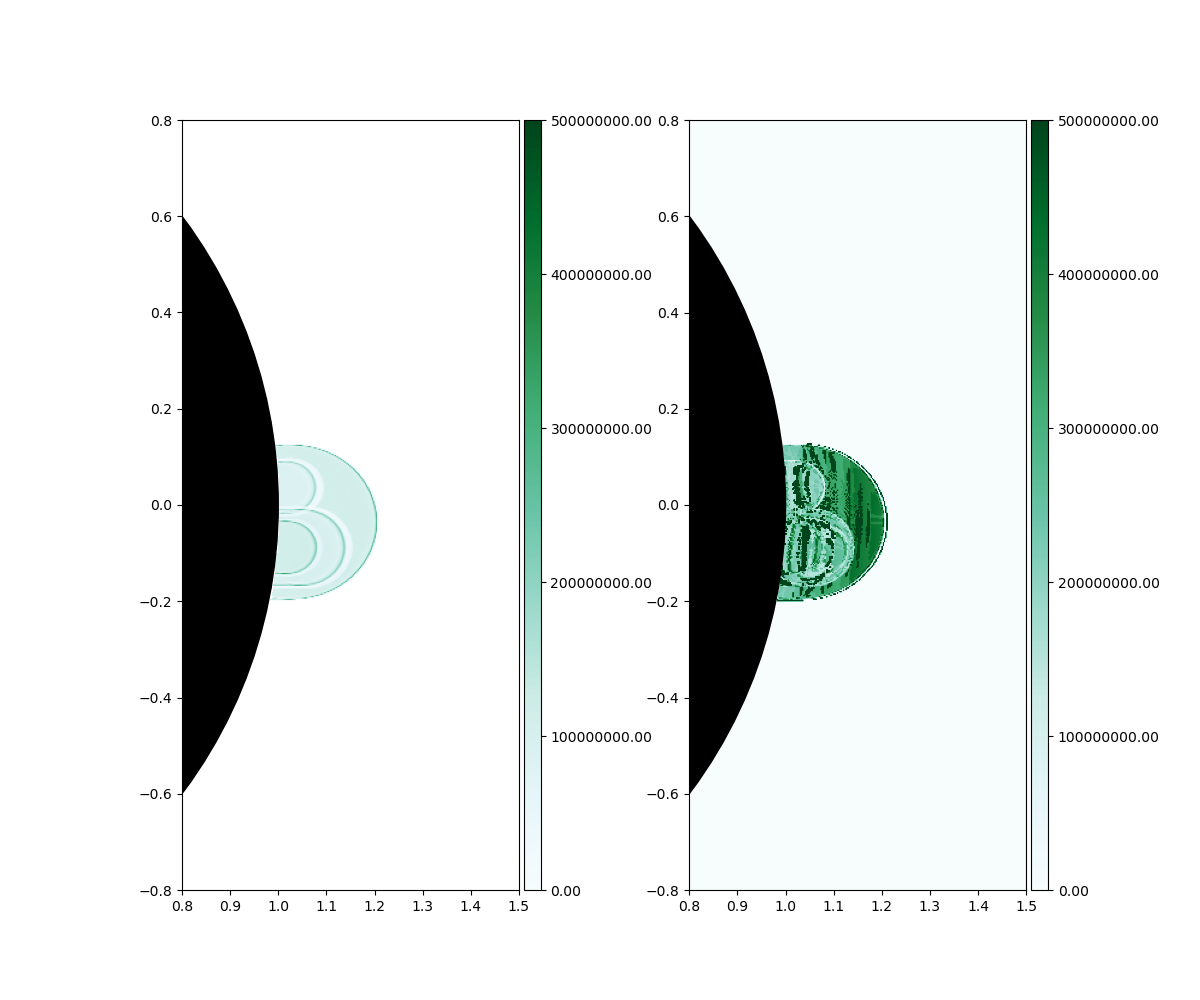

In [247]:
%matplotlib widget

fig, plots = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
ab=plots[0].imshow(nne1.T,extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=5e8,cmap='BuGn')
colorbar(ab)
c1 =patches.Circle((0, 0),1, color='black')
plots[0].add_patch(c1)

ab=plots[1].imshow(10**invout[:,:,0,2],extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=5e8,cmap='BuGn')
colorbar(ab)
c1 =patches.Circle((0, 0),1, color='black')
plots[1].add_patch(c1)


In [248]:
bx2=bx1.T
by2=by1.T
bz2=bz1.T
btot2=btot.T

aa=np.zeros((bx2.shape[0],bx2.shape[1],3))
for i in range(0,bx2.shape[0]):
    for j in range(0,bx2.shape[1]):
        aaa=np.argmin(np.abs(bx2[i,j]-invout[i,j,0:8,8]))
        aa[i,j,0]=invout[i,j,aaa,8]
        
        aaa=np.argmin(np.abs(by2[i,j]-invout[i,j,0:8,9]))
        aa[i,j,1]=invout[i,j,aaa,9]
        
        aaa=np.argmin(np.abs(bz2[i,j]-invout[i,j,0:8,10]))
        aa[i,j,2]=invout[i,j,aaa,10]        

In [249]:
srx1=230
srx2=400
sry1=65
sry2=195
rnge=[0.95,1.3,-0.3,0.3]

<ipython-input-250-2da3e001b022>:36: RuntimeWarning: divide by zero encountered in true_divide
  ab=plots[0,3].imshow(np.abs(aa[:,:,0]/(ratio*bx2))*100,extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=300,cmap='Reds')
<ipython-input-250-2da3e001b022>:47: RuntimeWarning: divide by zero encountered in true_divide
  axins1.hist(np.abs(aa[:,:,0]/(ratio*bx2)*100).flatten(),range=[-10,300],bins=100,color="r")
<ipython-input-250-2da3e001b022>:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


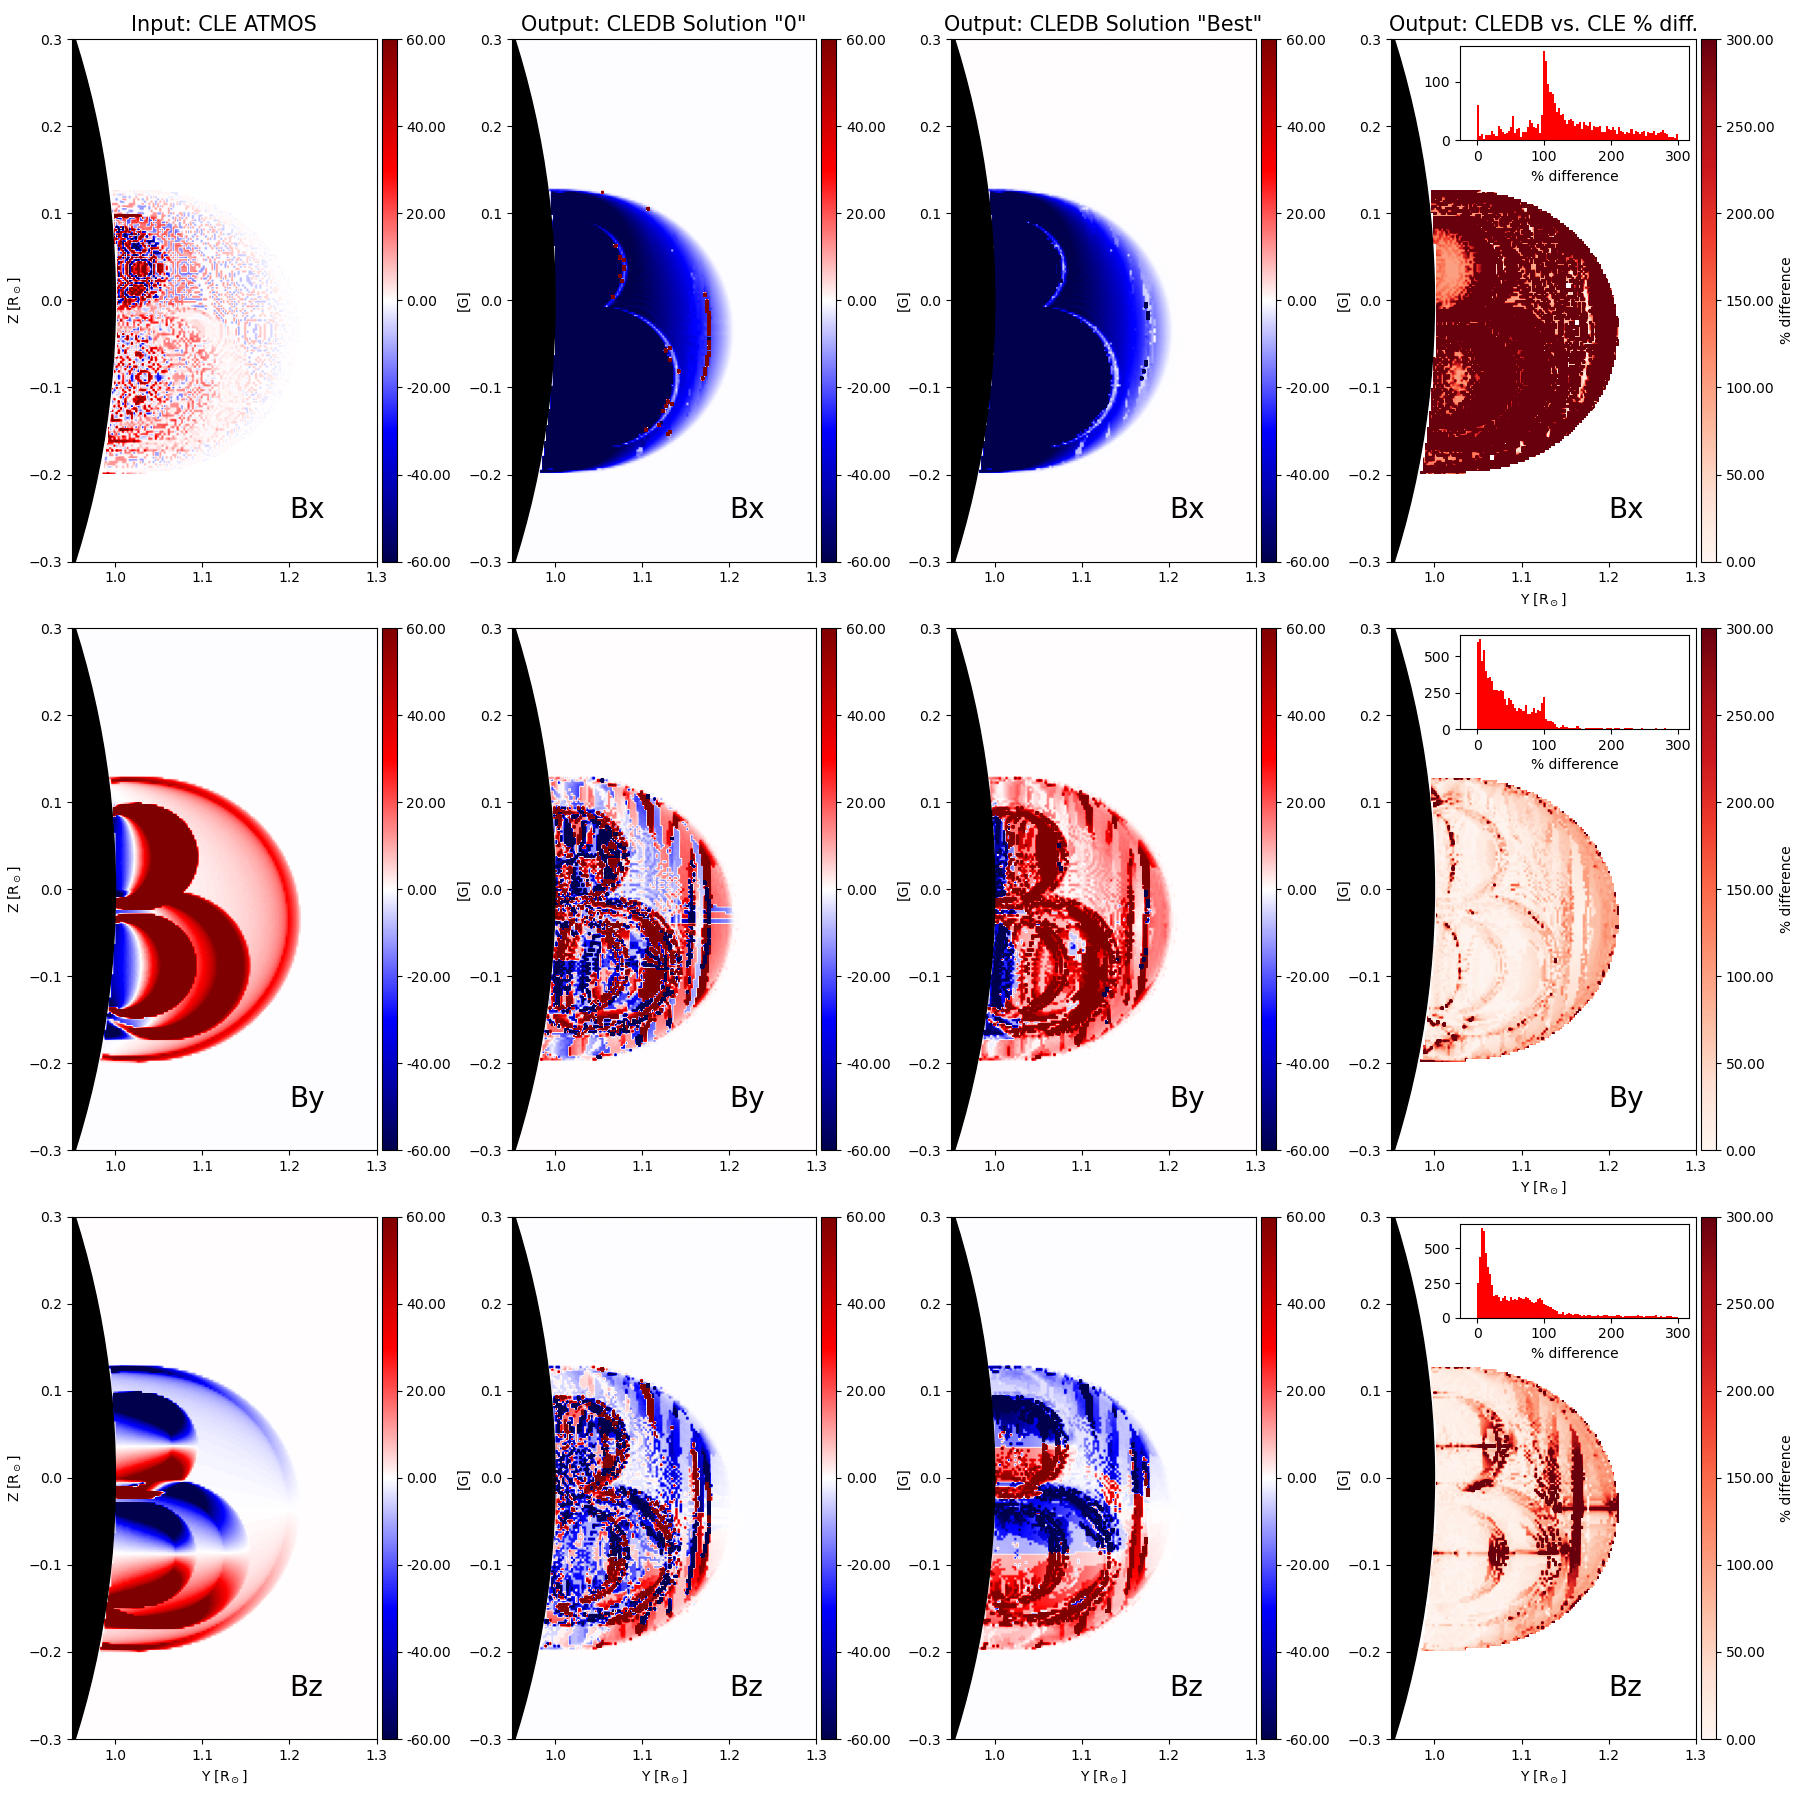

In [250]:
ratio=invout[:,:,0,5]/btot2

fig, plots = plt.subplots(nrows=3, ncols=4, figsize=(18, 18))
dmin=-60
dmax=60

##BX plots
ab=plots[0,0].imshow(bx2,extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[0,0].add_patch(c1)
plots[0,0].set_title('Input: CLE ATMOS',fontsize=15)
plots[0,0].set_ylabel('Z [R$_\odot$]')
plots[0,0].text(rnge[1]-0.1,rnge[2]+0.05,'Bx',fontsize=20)
plots[0,0].set_xlim(rnge[0:2])
plots[0,0].set_ylim(rnge[2:])

ab=plots[0,1].imshow(invout[:,:,0,8],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[0,1].add_patch(c1)
plots[0,1].set_title('Output: CLEDB Solution "0"',fontsize=15)
plots[0,1].text(rnge[1]-0.1,rnge[2]+0.05,'Bx',fontsize=20)
plots[0,1].set_xlim(rnge[0:2])
plots[0,1].set_ylim(rnge[2:])

ab=plots[0,2].imshow(aa[:,:,0],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[0,2].add_patch(c1)
plots[0,2].set_title('Output: CLEDB Solution "Best"',fontsize=15)
plots[0,2].text(rnge[1]-0.1,rnge[2]+0.05,'Bx',fontsize=20)
plots[0,2].set_xlim(rnge[0:2])
plots[0,2].set_ylim(rnge[2:])

ab=plots[0,3].imshow(np.abs(aa[:,:,0]/(ratio*bx2))*100,extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=300,cmap='Reds')
colorbar(ab, title='% difference')
c1 =patches.Circle((0, 0),1, color='black')
plots[0,3].add_patch(c1)
plots[0,3].set_xlabel('Y [R$_\odot$]')
plots[0,3].text(rnge[1]-0.1,rnge[2]+0.05,'Bx',fontsize=20)
plots[0,3].set_title('Output: CLEDB vs. CLE % diff.',fontsize=15)
plots[0,3].set_xlim(rnge[0:2])
plots[0,3].set_ylim(rnge[2:])

axins1 = inset_axes(plots[0,3], width="75%", height="18%", loc=1)
axins1.hist(np.abs(aa[:,:,0]/(ratio*bx2)*100).flatten(),range=[-10,300],bins=100,color="r")
axins1.set_xlabel('% difference')



##BY plots
ab=plots[1,0].imshow(by2,extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[1,0].add_patch(c1)
plots[1,0].set_ylabel('Z [R$_\odot$]')
plots[1,0].text(rnge[1]-0.1,rnge[2]+0.05,'By',fontsize=20)
plots[1,0].set_xlim(rnge[0:2])
plots[1,0].set_ylim(rnge[2:])

ab=plots[1,1].imshow(invout[:,:,0,9],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[1,1].add_patch(c1)
plots[1,1].text(rnge[1]-0.1,rnge[2]+0.05,'By',fontsize=20)
plots[1,1].set_xlim(rnge[0:2])
plots[1,1].set_ylim(rnge[2:])


ab=plots[1,2].imshow(aa[:,:,1],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[1,2].add_patch(c1)
plots[1,2].text(rnge[1]-0.1,rnge[2]+0.05,'By',fontsize=20)
plots[1,2].set_xlim(rnge[0:2])
plots[1,2].set_ylim(rnge[2:])

ab=plots[1,3].imshow(np.abs(aa[:,:,1]/(ratio*by2))*100,extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=300,cmap='Reds')
colorbar(ab, title='% difference')
c1 =patches.Circle((0, 0),1, color='black')
plots[1,3].add_patch(c1)
plots[1,3].set_xlabel('Y [R$_\odot$]')
plots[1,3].text(rnge[1]-0.1,rnge[2]+0.05,'By',fontsize=20)
plots[1,3].set_xlim(rnge[0:2])
plots[1,3].set_ylim(rnge[2:])

axins1 = inset_axes(plots[1,3], width="75%", height="18%", loc=1)
axins1.hist(np.abs(aa[:,:,1]/(ratio*by2)*100).flatten(),range=[-10,300],bins=100,color="r")
axins1.set_xlabel('% difference')




##BZ plots
ab=plots[2,0].imshow(bz2,extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[2,0].add_patch(c1)
plots[2,0].set_ylabel('Z [R$_\odot$]')
plots[2,0].set_xlabel('Y [R$_\odot$]')
plots[2,0].text(rnge[1]-0.1,rnge[2]+0.05,'Bz',fontsize=20)
plots[2,0].set_xlim(rnge[0:2])
plots[2,0].set_ylim(rnge[2:])

ab=plots[2,1].imshow(invout[:,:,1,10],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[2,1].add_patch(c1)
plots[2,1].set_xlabel('Y [R$_\odot$]')
plots[2,1].text(rnge[1]-0.1,rnge[2]+0.05,'Bz',fontsize=20)
plots[2,1].set_xlim(rnge[0:2])
plots[2,1].set_ylim(rnge[2:])


ab=plots[2,2].imshow(aa[:,:,2],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[2,2].add_patch(c1)
plots[2,2].set_xlabel('Y [R$_\odot$]')
plots[2,2].text(rnge[1]-0.1,rnge[2]+0.05,'Bz',fontsize=20)
plots[2,2].set_xlim(rnge[0:2])
plots[2,2].set_ylim(rnge[2:])

ab=plots[2,3].imshow(np.abs(aa[:,:,2]/(ratio*bz2))*100,extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=300,cmap='Reds')
colorbar(ab, title='% difference')
c1 =patches.Circle((0, 0),1, color='black')
plots[2,3].add_patch(c1)
plots[2,3].set_xlabel('Y [R$_\odot$]')
plots[2,3].text(rnge[1]-0.1,rnge[2]+0.05,'Bz',fontsize=20)
plots[2,3].set_xlim(rnge[0:2])
plots[2,3].set_ylim(rnge[2:])

axins1 = inset_axes(plots[2,3], width="75%", height="18%", loc=1)
axins1.hist(np.abs(aa[:,:,2]/(ratio*bz2)*100).flatten(),range=[-10,300],bins=100,color="r")
axins1.set_xlabel('% difference')

plt.tight_layout()
plt.savefig(f"/home/noxpara/Desktop/nso_sem_20211130/figs/polarimetry/clevscledb.pdf")

<ipython-input-251-a2c1055391e8>:34: RuntimeWarning: divide by zero encountered in true_divide
  ab=plots[0,3].imshow(np.abs(aa[:,:,0]/(ratio*bx2))*100,extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=300,cmap='Reds')
<ipython-input-251-a2c1055391e8>:48: RuntimeWarning: divide by zero encountered in true_divide
  plots[0,4].hist(np.abs(aa[:,:,0]/(ratio*bx2)*100).flatten(),range=[-10,300],bins=100,color="r")


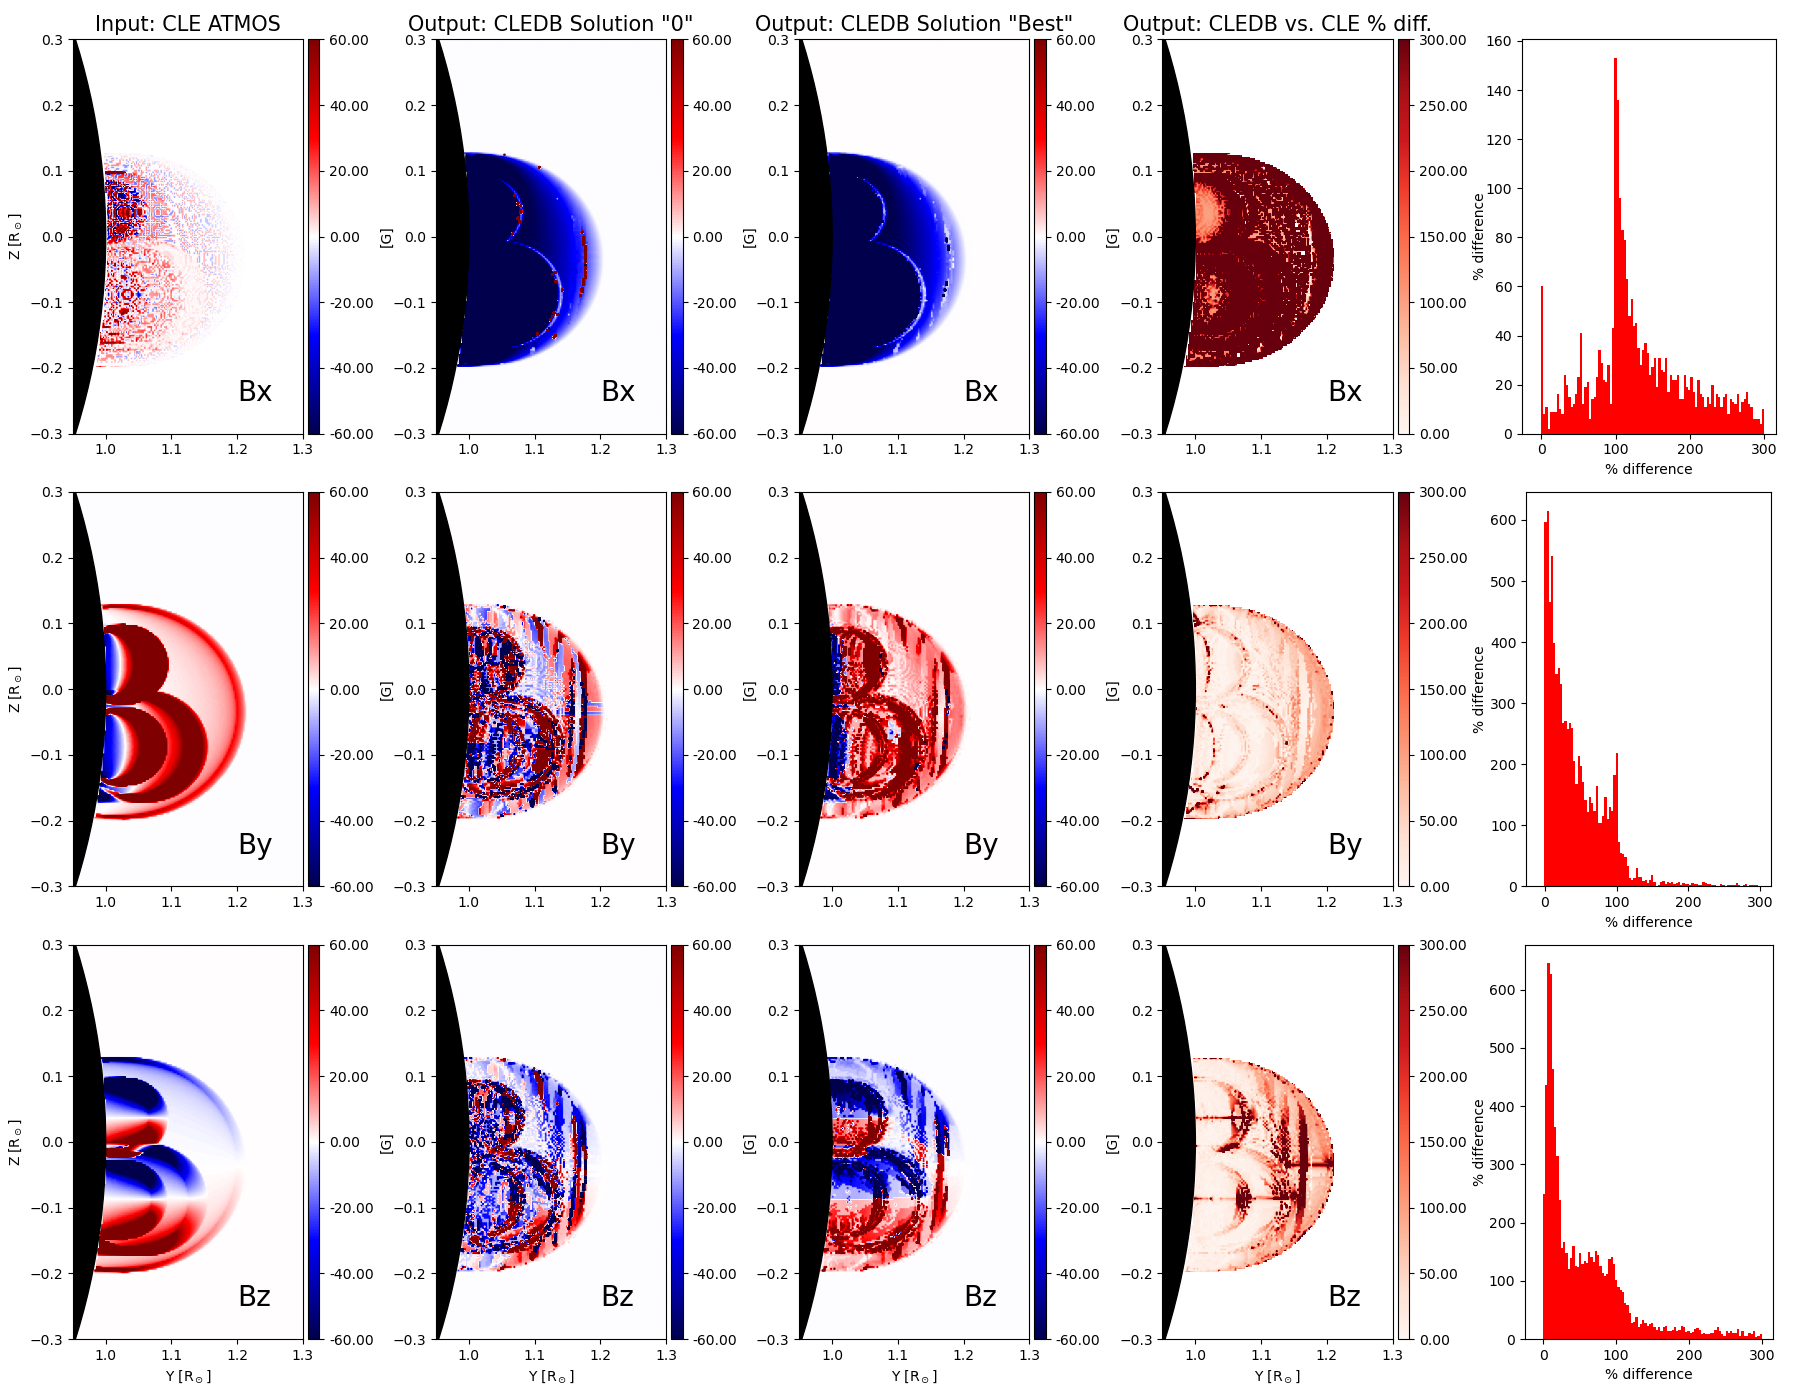

In [251]:
fig, plots = plt.subplots(nrows=3, ncols=5, figsize=(18, 14))
dmin=-60
dmax=60

##BX plots
ab=plots[0,0].imshow(bx2,extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[0,0].add_patch(c1)
plots[0,0].set_title('Input: CLE ATMOS',fontsize=15)
plots[0,0].set_ylabel('Z [R$_\odot$]')
plots[0,0].text(rnge[1]-0.1,rnge[2]+0.05,'Bx',fontsize=20)
plots[0,0].set_xlim(rnge[0:2])
plots[0,0].set_ylim(rnge[2:])

ab=plots[0,1].imshow(invout[:,:,0,8],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[0,1].add_patch(c1)
plots[0,1].set_title('Output: CLEDB Solution "0"',fontsize=15)
plots[0,1].text(rnge[1]-0.1,rnge[2]+0.05,'Bx',fontsize=20)
plots[0,1].set_xlim(rnge[0:2])
plots[0,1].set_ylim(rnge[2:])

ab=plots[0,2].imshow(aa[:,:,0],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[0,2].add_patch(c1)
plots[0,2].set_title('Output: CLEDB Solution "Best"',fontsize=15)
plots[0,2].text(rnge[1]-0.1,rnge[2]+0.05,'Bx',fontsize=20)
plots[0,2].set_xlim(rnge[0:2])
plots[0,2].set_ylim(rnge[2:])

ab=plots[0,3].imshow(np.abs(aa[:,:,0]/(ratio*bx2))*100,extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=300,cmap='Reds')
colorbar(ab, title='% difference')
c1 =patches.Circle((0, 0),1, color='black')
plots[0,3].add_patch(c1)
#plots[0,3].set_xlabel('Y [R$_\odot$]')
plots[0,3].text(rnge[1]-0.1,rnge[2]+0.05,'Bx',fontsize=20)
plots[0,3].set_title('Output: CLEDB vs. CLE % diff.',fontsize=15)
plots[0,3].set_xlim(rnge[0:2])
plots[0,3].set_ylim(rnge[2:])

# axins1 = inset_axes(plots[0,3], width="75%", height="18%", loc=1)
# axins1.hist(np.abs(aa[:,:,0]/(ratio*bx2)*100).flatten(),range=[-10,300],bins=100,color="r")
# axins1.set_xlabel('% difference')

plots[0,4].hist(np.abs(aa[:,:,0]/(ratio*bx2)*100).flatten(),range=[-10,300],bins=100,color="r")
plots[0,4].set_xlabel('% difference')
plots[0,4].set_aspect(3.3)

##BY plots
ab=plots[1,0].imshow(by2,extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[1,0].add_patch(c1)
plots[1,0].set_ylabel('Z [R$_\odot$]')
plots[1,0].text(rnge[1]-0.1,rnge[2]+0.05,'By',fontsize=20)
plots[1,0].set_xlim(rnge[0:2])
plots[1,0].set_ylim(rnge[2:])

ab=plots[1,1].imshow(invout[:,:,0,9],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[1,1].add_patch(c1)
plots[1,1].text(rnge[1]-0.1,rnge[2]+0.05,'By',fontsize=20)
plots[1,1].set_xlim(rnge[0:2])
plots[1,1].set_ylim(rnge[2:])

ab=plots[1,2].imshow(aa[:,:,1],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[1,2].add_patch(c1)
plots[1,2].text(rnge[1]-0.1,rnge[2]+0.05,'By',fontsize=20)
plots[1,2].set_xlim(rnge[0:2])
plots[1,2].set_ylim(rnge[2:])

ab=plots[1,3].imshow(np.abs(aa[:,:,1]/(ratio*by2))*100,extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=300,cmap='Reds')
colorbar(ab, title='% difference')
c1 =patches.Circle((0, 0),1, color='black')
plots[1,3].add_patch(c1)
#plots[1,3].set_xlabel('Y [R$_\odot$]')
plots[1,3].text(rnge[1]-0.1,rnge[2]+0.05,'By',fontsize=20)
plots[1,3].set_xlim(rnge[0:2])
plots[1,3].set_ylim(rnge[2:])

# axins1 = inset_axes(plots[1,3], width="75%", height="18%", loc=1)
# axins1.hist(np.abs(aa[:,:,1]/(ratio*by2)*100).flatten(),range=[-10,300],bins=100,color="r")
# axins1.set_xlabel('% difference')


plots[1,4].hist(np.abs(aa[:,:,1]/(ratio*by2)*100).flatten(),range=[-10,300],bins=100,color="r")
plots[1,4].set_xlabel('% difference')
plots[1,4].set_aspect(0.85)

##BZ plots
ab=plots[2,0].imshow(bz2,extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[2,0].add_patch(c1)
plots[2,0].set_ylabel('Z [R$_\odot$]')
plots[2,0].set_xlabel('Y [R$_\odot$]')
plots[2,0].text(rnge[1]-0.1,rnge[2]+0.05,'Bz',fontsize=20)
plots[2,0].set_xlim(rnge[0:2])
plots[2,0].set_ylim(rnge[2:])

ab=plots[2,1].imshow(invout[:,:,1,10],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[2,1].add_patch(c1)
plots[2,1].set_xlabel('Y [R$_\odot$]')
plots[2,1].text(rnge[1]-0.1,rnge[2]+0.05,'Bz',fontsize=20)
plots[2,1].set_xlim(rnge[0:2])
plots[2,1].set_ylim(rnge[2:])


ab=plots[2,2].imshow(aa[:,:,2],extent=[0.8,1.5,-0.8,0.8],vmin=dmin,vmax=dmax,cmap='seismic')
colorbar(ab, title='[G]')
c1 =patches.Circle((0, 0),1, color='black')
plots[2,2].add_patch(c1)
plots[2,2].set_xlabel('Y [R$_\odot$]')
plots[2,2].text(rnge[1]-0.1,rnge[2]+0.05,'Bz',fontsize=20)
plots[2,2].set_xlim(rnge[0:2])
plots[2,2].set_ylim(rnge[2:])

ab=plots[2,3].imshow(np.abs(aa[:,:,2]/(ratio*bz2))*100,extent=[0.8,1.5,-0.8,0.8],vmin=0,vmax=300,cmap='Reds')
colorbar(ab, title='% difference')
c1 =patches.Circle((0, 0),1, color='black')
plots[2,3].add_patch(c1)
plots[2,3].set_xlabel('Y [R$_\odot$]')
plots[2,3].text(rnge[1]-0.1,rnge[2]+0.05,'Bz',fontsize=20)
plots[2,3].set_xlim(rnge[0:2])
plots[2,3].set_ylim(rnge[2:])

# axins1 = inset_axes(plots[2,3], width="75%", height="18%", loc=1)
# axins1.hist(np.abs(aa[:,:,2]/(ratio*bz2)*100).flatten(),range=[-10,300],bins=100,color="r")
# axins1.set_xlabel('% difference')
plots[2,4].hist(np.abs(aa[:,:,2]/(ratio*bz2)*100).flatten(),range=[-10,300],bins=100,color="r")
plots[2,4].set_xlabel('% difference')
plots[2,4].set_aspect(0.8)

plt.tight_layout()
plt.savefig(f"/home/noxpara/Desktop/nso_sem_20211130/figs/polarimetry/clevscledb1.pdf")

(array([  0.,   0.,   0., 249., 437., 645., 627., 463., 364., 315., 239., 157., 166., 148., 120., 139., 160., 126., 123., 147., 128., 134., 130., 150., 140., 132., 151., 144., 125., 114., 108., 111.,
        137., 140., 129., 101.,  89.,  84.,  80.,  62.,  59.,  45.,  27.,  30.,  38.,  20.,  25.,  33.,  28.,  23.,  26.,  28.,  20.,  15.,  20.,  14.,  21.,  23.,  14.,  13.,  16.,  20.,  13.,  15.,
         22.,  20.,  12.,  13.,  10.,  12.,  17.,  19.,  16.,   8.,  10.,   9.,   9.,  11.,  10.,  16.,  21.,  13.,   9.,   6.,  14.,  11.,  14.,  11.,  11.,  18.,   5.,  14.,   5.,   6.,  10.,   9.,
         13.,   4.,   5.,   8.]),
 array([-10. ,  -6.9,  -3.8,  -0.7,   2.4,   5.5,   8.6,  11.7,  14.8,  17.9,  21. ,  24.1,  27.2,  30.3,  33.4,  36.5,  39.6,  42.7,  45.8,  48.9,  52. ,  55.1,  58.2,  61.3,  64.4,  67.5,  70.6,
         73.7,  76.8,  79.9,  83. ,  86.1,  89.2,  92.3,  95.4,  98.5, 101.6, 104.7, 107.8, 110.9, 114. , 117.1, 120.2, 123.3, 126.4, 129.5, 132.6, 135.7, 138.8, 141.9, 

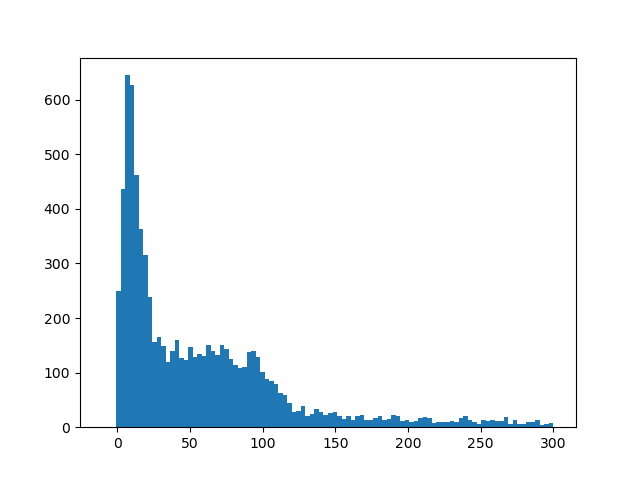

In [252]:
%matplotlib widget
#im=plt.imshow(aa[:,:,2]/(ratio*bz2)*100,vmin=0,vmax=100)
#colorbar(im)
plt.hist(np.abs(aa[:,:,2]/(ratio*bz2)*100).flatten(),range=[-10,300],bins=100)

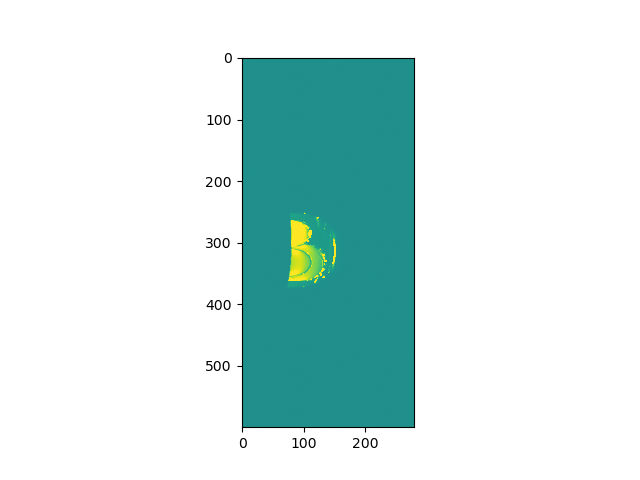

In [253]:
plt.figure()
plt.imshow(invout[:,:,0,5],vmin=-600,vmax=600)



In [254]:
##Print inversion solution in a human readable way

np.set_printoptions(linewidth=200,suppress=False)   ## Suppress can be set to true to disable exponential notation.

plt.imshow(nne1.T,extent=[0.8,1.5,-0.8,0.8])

xx=289  #283  ## x pixel position
yy=155   #153  ## y pixel positions
nne2=np.log10(nne1[yy,xx])

print("||    DB Index   ||     chi^2    ||  ne density  ||  y (height)  || x (LOS pos.) ||      B       ||    B_theta   ||    B_phi     ||      Bx      ||      By      ||     Bz       ||")
print(invout[xx,yy,:,:])
rat=invout[xx,yy,0,5]/btot2[xx,yy]
print("||    DB Index   ||     chi^2    ||",nne2,"||  y (height)  || x (LOS pos.) ||    ",rat*btot2[xx,yy],"       ||    B_theta   ||    B_phi     ||",rat*bx2[xx,yy],rat*by2[xx,yy],rat*bz2[xx,yy])

||    DB Index   ||     chi^2    ||  ne density  ||  y (height)  || x (LOS pos.) ||      B       ||    B_theta   ||    B_phi     ||      Bx      ||      By      ||     Bz       ||
[[ 6.97143900e+06  7.15307271e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.49916567e+00  2.10609553e+00  1.37665310e+00 -1.75138617e+00  2.95314649e+00  6.75079775e-01]
 [ 7.62485100e+06  7.15307271e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.49916567e+00  4.21219106e+00  1.80023867e+00 -1.63421723e+00 -2.99000792e+00 -7.95831064e-01]
 [ 6.97955100e+06  7.30752362e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.50063758e+00  5.26523883e+00  1.80023867e+00 -1.79006218e+00  2.90107925e+00  7.96165827e-01]
 [ 7.61673900e+06  7.30752362e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.50063758e+00  1.05304777e+00  1.37665310e+00 -1.70000427e+00 -2.98468302e+00 -6.75363744e-01]
 [ 6.97144000e+06  8.78833533e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.47710988e+00  2.106

In [242]:
print(293.15/412.939,12.9/40,1/24.2*35.8)

0.709911149104347 0.3225 1.4793388429752066


In [243]:
##20211112 3 dipole out

# ||    DB Index   ||     chi^2    ||  ne density  ||  y (height)  || x (LOS pos.) ||      B       ||    B_theta   ||    B_phi     ||      Bx      ||      By      ||     Bz       ||
# [[ 1.204330e+06  1.229387e-05  6.232124e+00  1.197628e+00 -7.933898e-01  1.955117e-01  2.141197e+00  1.411952e+00 -1.042413e-01  1.624875e-01  3.092551e-02]
#  [ 1.727960e+06  1.229387e-05  6.180804e+00  1.197628e+00  8.445763e-01  1.955117e-01  4.177089e+00  1.764940e+00 -9.785664e-02 -1.650035e-01 -3.771933e-02]
#  [ 1.212440e+06  1.229730e-05  6.232124e+00  1.197628e+00 -7.933898e-01 -1.955707e-01  5.300340e+00  1.764940e+00 -1.064369e-01  1.596731e-01  3.773073e-02]
#  [ 1.719850e+06  1.229730e-05  6.180804e+00  1.197628e+00  8.445763e-01 -1.955707e-01  1.017946e+00  1.411952e+00 -1.014042e-01 -1.643415e-01 -3.093485e-02]
#  [ 1.220440e+06  2.043927e-05  6.283495e+00  1.197628e+00 -7.422034e-01  2.063078e-01  2.106096e+00  1.411952e+00 -1.039124e-01  1.752147e-01  3.263321e-02]
#  [ 1.711850e+06  2.043927e-05  6.232124e+00  1.197628e+00  7.933898e-01  2.063078e-01  4.212191e+00  1.764940e+00 -9.708622e-02 -1.776316e-01 -3.980220e-02]
#  [ 1.228550e+06  2.044252e-05  6.283495e+00  1.197628e+00 -7.422034e-01 -2.063736e-01  5.265239e+00  1.764940e+00 -1.063339e-01  1.723309e-01  3.981489e-02]
#  [ 1.703740e+06  2.044252e-05  6.232124e+00  1.197628e+00  7.933898e-01 -2.063736e-01  1.053048e+00  1.411952e+00 -1.008536e-01 -1.770678e-01 -3.264362e-02]
#  [ 3.120690e+05  2.954199e-05  6.062869e+00  1.197628e+00 -5.374576e-01  1.490505e+00  1.649775e+00  1.376653e+00 -1.153863e-01  1.457944e+00  2.875570e-01]
#  [ 6.762210e+05  2.954199e-05  6.013657e+00  1.197628e+00  5.886441e-01  1.490505e+00  4.668512e+00  1.800239e+00 -6.366487e-02 -1.450047e+00 -3.389922e-01]
#  [ 3.201810e+05  2.954244e-05  6.062869e+00  1.197628e+00 -5.374576e-01 -1.493944e+00  4.808918e+00  1.800239e+00 -1.402120e-01  1.448020e+00  3.397745e-01]
#  [ 6.681090e+05  2.954244e-05  6.013657e+00  1.197628e+00  5.886441e-01 -1.493944e+00  1.509368e+00  1.376653e+00 -8.998913e-02 -1.463113e+00 -2.882206e-01]
#  [ 1.188130e+06  3.541684e-05  6.180804e+00  1.197628e+00 -8.445763e-01  1.942793e-01  2.141197e+00  1.411952e+00 -1.035842e-01  1.614632e-01  3.073057e-02]
#  [ 1.744160e+06  3.541684e-05  6.129669e+00  1.197628e+00  8.957627e-01  1.942793e-01  4.177089e+00  1.764940e+00 -9.723980e-02 -1.639634e-01 -3.748157e-02]
#  [ 1.196240e+06  3.542029e-05  6.180804e+00  1.197628e+00 -8.445763e-01 -1.943376e-01  5.300340e+00  1.764940e+00 -1.057658e-01  1.586663e-01  3.749282e-02]
#  [ 1.736050e+06  3.542029e-05  6.129669e+00  1.197628e+00  8.957627e-01 -1.943376e-01  1.017946e+00  1.411952e+00 -1.007648e-01 -1.633053e-01 -3.073979e-02]
#  [ 3.282690e+05  3.742348e-05  6.110584e+00  1.197628e+00 -4.862712e-01  1.487369e+00  1.649775e+00  1.376653e+00 -1.151435e-01  1.454877e+00  2.869521e-01]
#  [ 6.600210e+05  3.742348e-05  6.062869e+00  1.197628e+00  5.374576e-01  1.487369e+00  4.668512e+00  1.800239e+00 -6.353095e-02 -1.446996e+00 -3.382791e-01]
#  [ 3.363810e+05  3.742393e-05  6.110584e+00  1.197628e+00 -4.862712e-01 -1.490795e+00  4.808918e+00  1.800239e+00 -1.399163e-01  1.444968e+00  3.390581e-01]
#  [ 6.519090e+05  3.742393e-05  6.062869e+00  1.197628e+00  5.374576e-01 -1.490795e+00  1.509368e+00  1.376653e+00 -8.979940e-02 -1.460028e+00 -2.876129e-01]]
# ||    DB Index   ||     chi^2    || 5.575060192513247 ||  y (height)  || x (LOS pos.) ||     0.19551167386186682        ||    B_theta   ||    B_phi     || 0.00485097742237746 0.1918438266674374 -0.03737952385880268


In [ ]:
##20220217 3 dipole out
# ||    DB Index   ||     chi^2    ||  ne density  ||  y (height)  || x (LOS pos.) ||      B       ||    B_theta   ||    B_phi     ||      Bx      ||      By      ||     Bz       ||
# [[ 1.25275000e+06  1.04737622e-07  6.38576809e+00  1.19755683e+00 -6.39830504e-01  2.20470746e-01  2.07099394e+00  1.41195190e+00 -1.04406380e-01  1.91024865e-01  3.48734643e-02]
#  [ 1.26086000e+06  1.04737622e-07  6.38576809e+00  1.19755683e+00 -6.39830504e-01 -2.20545855e-01  5.23013724e+00  1.76493988e+00 -1.07102968e-01  1.88039900e-01  4.25490837e-02]
#  [ 1.67143000e+06  1.04737622e-07  6.33486521e+00  1.19755683e+00  6.91016945e-01 -2.20545855e-01  1.08814936e+00  1.41195190e+00 -1.01072284e-01 -1.92893443e-01 -3.48853449e-02]
#  [ 1.67954000e+06  1.04737622e-07  6.33486521e+00  1.19755683e+00  6.91016945e-01  2.20470746e-01  4.24729266e+00  1.76493988e+00 -9.70254000e-02 -1.93350019e-01 -4.25345932e-02]
#  [ 2.96950000e+05  1.98570870e-07  6.01379795e+00  1.19755683e+00 -5.88644064e-01  2.20238516e-01  2.07099394e+00  1.41195190e+00 -1.04296405e-01  1.90823652e-01  3.48367308e-02]
#  [ 3.05060000e+05  1.98570870e-07  6.01379795e+00  1.19755683e+00 -5.88644064e-01 -2.20313467e-01  5.23013724e+00  1.76493988e+00 -1.06990114e-01  1.87841764e-01  4.25042499e-02]
#  [ 6.83230000e+05  1.98570870e-07  5.96354587e+00  1.19755683e+00  6.39830504e-01 -2.20313467e-01  1.08814936e+00  1.41195190e+00 -1.00965785e-01 -1.92690192e-01 -3.48485864e-02]
#  [ 6.91340000e+05  1.98570870e-07  5.96354587e+00  1.19755683e+00  6.39830504e-01  2.20238516e-01  4.24729266e+00  1.76493988e+00 -9.69231995e-02 -1.93146357e-01 -4.24897899e-02]
#  [ 2.92144000e+06  6.95150233e-07  6.40727365e+00  1.19755683e+00 -1.50999999e+00  2.06961158e-01  2.10609553e+00  1.41195190e+00 -1.04241502e-01  1.75769588e-01  3.27365543e-02]
#  [ 2.92955000e+06  6.95150233e-07  6.40727365e+00  1.19755683e+00 -1.50999999e+00 -2.07027343e-01  5.26523883e+00  1.76493988e+00 -1.06670731e-01  1.72876811e-01  3.99410079e-02]
#  [ 2.92135000e+06  6.99155797e-07  6.40727365e+00  1.19755683e+00 -1.50999999e+00  2.20703221e-01  2.07099394e+00  1.41195190e+00 -1.04516471e-01  1.91226291e-01  3.49102366e-02]
#  [ 2.92946000e+06  6.99155797e-07  6.40727365e+00  1.19755683e+00 -1.50999999e+00 -2.20778489e-01  5.23013724e+00  1.76493988e+00 -1.07215941e-01  1.88238246e-01  4.25939648e-02]
#  [ 2.16004000e+06  7.69735721e-07  6.60312691e+00  1.19755683e+00 -8.44576266e-01  2.06961158e-01  2.10609553e+00  1.41195190e+00 -1.04241502e-01  1.75769588e-01  3.27365543e-02]
#  [ 2.16815000e+06  7.69735721e-07  6.60312691e+00  1.19755683e+00 -8.44576266e-01 -2.07027343e-01  5.26523883e+00  1.76493988e+00 -1.06670731e-01  1.72876811e-01  3.99410079e-02]
#  [ 2.70814000e+06  7.69735721e-07  6.55198599e+00  1.19755683e+00  8.95762706e-01 -2.07027343e-01  1.05304777e+00  1.41195190e+00 -1.01173081e-01 -1.77628717e-01 -3.27470233e-02]
#  [ 2.71625000e+06  7.69735721e-07  6.55198599e+00  1.19755683e+00  8.95762706e-01  2.06961158e-01  4.21219106e+00  1.76493988e+00 -9.73936673e-02 -1.78194080e-01 -3.99282391e-02]
#  [ 2.12773000e+06  8.24127418e-07  6.50114013e+00  1.19755683e+00 -9.46949147e-01  1.95100003e-01  2.14119712e+00  1.41195190e+00 -1.04021784e-01  1.62145355e-01  3.08603891e-02]
#  [ 2.13584000e+06  8.24127418e-07  6.50114013e+00  1.19755683e+00 -9.46949147e-01 -1.95158818e-01  5.30034042e+00  1.76493988e+00 -1.06212732e-01  1.59336759e-01  3.76512580e-02]
#  [ 2.74045000e+06  8.24127418e-07  6.45068284e+00  1.19755683e+00  9.98135587e-01 -1.95158818e-01  1.01794617e+00  1.41195190e+00 -1.01190650e-01 -1.63995362e-01 -3.08696923e-02]
#  [ 2.74856000e+06  8.24127418e-07  6.45068284e+00  1.19755683e+00  9.98135587e-01  1.95100003e-01  4.17708947e+00  1.76493988e+00 -9.76505919e-02 -1.64656036e-01 -3.76399110e-02]]
# ||    DB Index   ||     chi^2    || 5.575060192513247 ||  y (height)  || x (LOS pos.) ||     0.22047074611052425        ||    B_theta   ||    B_phi     || 0.005470254489419848 0.2163346605684068 -0.042151403809415885


In [ ]:
###7 vectors
||    DB Index   ||     chi^2    ||  ne density  ||  y (height)  || x (LOS pos.) ||      B       ||    B_theta   ||    B_phi     ||      Bx      ||      By      ||     Bz       ||
[[ 6.97143900e+06  7.15307271e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.49916567e+00  2.10609553e+00  1.37665310e+00 -1.75138617e+00  2.95314649e+00  6.75079775e-01]
 [ 7.62485100e+06  7.15307271e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.49916567e+00  4.21219106e+00  1.80023867e+00 -1.63421723e+00 -2.99000792e+00 -7.95831064e-01]
 [ 6.97955100e+06  7.30752362e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.50063758e+00  5.26523883e+00  1.80023867e+00 -1.79006218e+00  2.90107925e+00  7.96165827e-01]
 [ 7.61673900e+06  7.30752362e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.50063758e+00  1.05304777e+00  1.37665310e+00 -1.70000427e+00 -2.98468302e+00 -6.75363744e-01]
 [ 6.97144000e+06  8.78833533e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.47710988e+00  2.10609553e+00  1.41195190e+00 -1.75133904e+00  2.95306703e+00  5.49999804e-01]
 [ 7.62485000e+06  8.78833533e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.47710988e+00  4.21219106e+00  1.76493988e+00 -1.63629005e+00 -2.99380039e+00 -6.70825752e-01]
 [ 6.97152900e+06  8.86288805e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.30211259e+00  2.14119712e+00  1.37665310e+00 -1.74954249e+00  2.72712289e+00  6.37063127e-01]
 [ 7.62476100e+06  8.86288805e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.30211259e+00  4.17708947e+00  1.80023867e+00 -1.64026073e+00 -2.76576747e+00 -7.51014392e-01]
 [ 6.97955000e+06  8.94376614e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.47856328e+00  5.26523883e+00  1.76493988e+00 -1.79232792e+00  2.90475123e+00  6.71106152e-01]
 [ 7.61674000e+06  8.94376614e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.47856328e+00  1.05304777e+00  1.41195190e+00 -1.69995402e+00 -2.98459480e+00 -5.50229700e-01]
 [ 6.97964100e+06  9.02655773e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.30342336e+00  5.30034042e+00  1.80023867e+00 -1.78425138e+00  2.67667376e+00  7.51312505e-01]
 [ 7.61664900e+06  9.02655773e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.30342336e+00  1.01794617e+00  1.37665310e+00 -1.70208810e+00 -2.75850145e+00 -6.37316008e-01]
 [ 6.97153000e+06  9.85004456e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.27784239e+00  2.14119712e+00  1.41195190e+00 -1.74765252e+00  2.72417688e+00  5.18480214e-01]
 [ 7.62476000e+06  9.85004456e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.27784239e+00  4.17708947e+00  1.76493988e+00 -1.64061119e+00 -2.76635841e+00 -6.32381824e-01]
 [ 6.97964000e+06  1.00148713e-06  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.27913395e+00  5.30034042e+00  1.76493988e+00 -1.78462740e+00  2.67723786e+00  6.32631000e-01]
 [ 7.61665000e+06  1.00148713e-06  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.27913395e+00  1.01794617e+00  1.41195190e+00 -1.70024444e+00 -2.75551351e+00 -5.18684510e-01]
 [ 6.97143800e+06  1.04044027e-06  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.52879113e+00  2.10609553e+00  1.34135431e+00 -1.75285816e+00  2.95562853e+00  8.02567797e-01]
 [ 7.62485200e+06  1.04044027e-06  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.52879113e+00  4.21219106e+00  1.83553747e+00 -1.63344250e+00 -2.98859045e+00 -9.23341510e-01]
 [ 6.97955200e+06  1.05575567e-06  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.53028807e+00  5.26523883e+00  1.83553747e+00 -1.78921995e+00  2.89971426e+00  9.23733198e-01]
 [ 7.61673800e+06  1.05575567e-06  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.53028807e+00  1.05304777e+00  1.34135431e+00 -1.70143914e+00 -2.98720221e+00 -8.02908252e-01]]
||    DB Index   ||     chi^2    || 8.313292615133975 ||  y (height)  || x (LOS pos.) ||     3.499165670531217        ||    B_theta   ||    B_phi     || 0.05560908668442637 3.399856336325922 -0.8258601041621899


In [ ]:
####8 vectors
||    DB Index   ||     chi^2    ||  ne density  ||  y (height)  || x (LOS pos.) ||      B       ||    B_theta   ||    B_phi     ||      Bx      ||      By      ||     Bz       ||
[[ 6.97143900e+06  7.15307271e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.49916567e+00  2.10609553e+00  1.37665310e+00 -1.75138617e+00  2.95314649e+00  6.75079775e-01]
 [ 7.62485100e+06  7.15307271e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.49916567e+00  4.21219106e+00  1.80023867e+00 -1.63421723e+00 -2.99000792e+00 -7.95831064e-01]
 [ 6.97955100e+06  7.30752362e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.50063758e+00  5.26523883e+00  1.80023867e+00 -1.79006218e+00  2.90107925e+00  7.96165827e-01]
 [ 7.61673900e+06  7.30752362e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.50063758e+00  1.05304777e+00  1.37665310e+00 -1.70000427e+00 -2.98468302e+00 -6.75363744e-01]
 [ 6.97144000e+06  8.78833533e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.47710988e+00  2.10609553e+00  1.41195190e+00 -1.75133904e+00  2.95306703e+00  5.49999804e-01]
 [ 7.62485000e+06  8.78833533e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.47710988e+00  4.21219106e+00  1.76493988e+00 -1.63629005e+00 -2.99380039e+00 -6.70825752e-01]
 [ 6.97152900e+06  8.86288805e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.30211259e+00  2.14119712e+00  1.37665310e+00 -1.74954249e+00  2.72712289e+00  6.37063127e-01]
 [ 7.62476100e+06  8.86288805e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.30211259e+00  4.17708947e+00  1.80023867e+00 -1.64026073e+00 -2.76576747e+00 -7.51014392e-01]
 [ 6.97955000e+06  8.94376614e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.47856328e+00  5.26523883e+00  1.76493988e+00 -1.79232792e+00  2.90475123e+00  6.71106152e-01]
 [ 7.61674000e+06  8.94376614e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.47856328e+00  1.05304777e+00  1.41195190e+00 -1.69995402e+00 -2.98459480e+00 -5.50229700e-01]
 [ 6.97964100e+06  9.02655773e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.30342336e+00  5.30034042e+00  1.80023867e+00 -1.78425138e+00  2.67667376e+00  7.51312505e-01]
 [ 7.61664900e+06  9.02655773e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.30342336e+00  1.01794617e+00  1.37665310e+00 -1.70208810e+00 -2.75850145e+00 -6.37316008e-01]
 [ 6.97153000e+06  9.85004456e-07  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.27784239e+00  2.14119712e+00  1.41195190e+00 -1.74765252e+00  2.72417688e+00  5.18480214e-01]
 [ 7.62476000e+06  9.85004456e-07  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.27784239e+00  4.17708947e+00  1.76493988e+00 -1.64061119e+00 -2.76635841e+00 -6.32381824e-01]
 [ 6.97964000e+06  1.00148713e-06  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.27913395e+00  5.30034042e+00  1.76493988e+00 -1.78462740e+00  2.67723786e+00  6.32631000e-01]
 [ 7.61665000e+06  1.00148713e-06  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.27913395e+00  1.01794617e+00  1.41195190e+00 -1.70024444e+00 -2.75551351e+00 -5.18684510e-01]
 [ 6.97143800e+06  1.04044027e-06  8.57350311e+00  1.18764151e+00 -9.98135587e-01  3.52879113e+00  2.10609553e+00  1.34135431e+00 -1.75285816e+00  2.95562853e+00  8.02567797e-01]
 [ 7.62485200e+06  1.04044027e-06  8.52282970e+00  1.18764151e+00  1.04932203e+00  3.52879113e+00  4.21219106e+00  1.83553747e+00 -1.63344250e+00 -2.98859045e+00 -9.23341510e-01]
 [ 6.97955200e+06  1.05575567e-06  8.57350311e+00  1.18764151e+00 -9.98135587e-01 -3.53028807e+00  5.26523883e+00  1.83553747e+00 -1.78921995e+00  2.89971426e+00  9.23733198e-01]
 [ 7.61673800e+06  1.05575567e-06  8.52282970e+00  1.18764151e+00  1.04932203e+00 -3.53028807e+00  1.05304777e+00  1.34135431e+00 -1.70143914e+00 -2.98720221e+00 -8.02908252e-01]]
||    DB Index   ||     chi^2    || 8.313292615133975 ||  y (height)  || x (LOS pos.) ||     3.499165670531217        ||    B_theta   ||    B_phi     || 0.05560908668442637 3.399856336325922 -0.8258601041621899
